# Project 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def dirichlet(G, alpha = 1, beta = 1):
    """ Create a one-dimensional vector for Dirichlet conditions. Uses natural ordering.

    Args:
        G (array(4 x M-1)): Matrix with row vectors corresponding respectively to boundary at x = x0, y = y0, x = xend, y = yend
        alpha, beta (floats): Constants as defined in text. Optional arguments. 

    Returns:
        g (array(M-1)^2): One dimensional array meant for use in linear system, using natural ordering
    """
    M = G.shape[1] + 1
    g = np.zeros((M-1)**2)
    g[:M-1] += beta * G[0]          # g_B
    g[ :: M-1] += alpha * G[1]      # g_L
    g[-(M-1):] += beta * G[2]       # g_T
    g[M-2:: M-1] += alpha * G[3]    # g_R
    return g

def dirichlet2(boundaries, alpha = 1, beta = 1):
    l, t, r, b = boundaries
    M = l.shape[0] - 1         # l is M+1
    G = np.zeros((M-1, M-1))
    G[0, :] += beta * np.append(b[M: 2: -1], 0)
    G[-1, :] += beta * np.insert(t[2: M], 0, 0)
    G[:, 0] += alpha * l[1:M] + beta * l[0:M-1]
    G[:, -1] += alpha * r[M:1:-1] + beta * r[M-1:0:-1]
    return G.flatten()


# Testing
M = 10
G = np.ones((4,M-1))
g = dirichlet(G, 0.5, 2)
#print(g.reshape((M-1, M-1)))

l = np.arange(M+1)
t = np.arange(M+1)
r = np.arange(M+1)
b = np.arange(M+1)
g2 = dirichlet2([l, t, r, b], 1, 1)
print(g2.reshape((M-1,M-1)))

[[11.  9.  8.  7.  6.  5.  4.  3. 19.]
 [ 3.  0.  0.  0.  0.  0.  0.  0. 17.]
 [ 5.  0.  0.  0.  0.  0.  0.  0. 15.]
 [ 7.  0.  0.  0.  0.  0.  0.  0. 13.]
 [ 9.  0.  0.  0.  0.  0.  0.  0. 11.]
 [11.  0.  0.  0.  0.  0.  0.  0.  9.]
 [13.  0.  0.  0.  0.  0.  0.  0.  7.]
 [15.  0.  0.  0.  0.  0.  0.  0.  5.]
 [17.  2.  3.  4.  5.  6.  7.  8. 12.]]


[[-6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  1. -6.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  1. -6. 

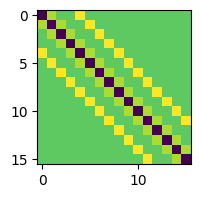

In [7]:
def ndiag(consts, offsets, N):
    """Generate a matrix with arbitrary number of constant diagonals, 0 elsewhere

    Args:
        consts (list of floats):    list containing floats on diagonal
        offsets (list of ints):     list of offsets. Corresponds to the consts list
        N (int):                    length of array

    Returns:
        A (N x N matrix):           matrix with diagonals as specified
    """
    diags = []
    for i in range(len(consts)):
        diags.append(consts[i] * np.ones(N - np.abs(offsets[i])))

    A = np.zeros((N,N))
    for i in range(len(diags)):
        A += np.diag(diags[i], offsets[i])
    return A

# Testing
"""N = 10
consts = [1, 3, 5, -1]
offsets = [0, 1, 2, -6]
A = ndiag(consts, offsets, N)
print(A)
"""
M = 5
alpha, beta = 1, 2
consts = [beta, alpha, -2*(alpha + beta), alpha, beta]
offsets = [-(M-1), -1, 0, 1, M-1]
A = ndiag(consts, offsets, (M-1)**2)
print(A)
plt.figure(figsize = (2,2))
plt.imshow(A)
plt.show()

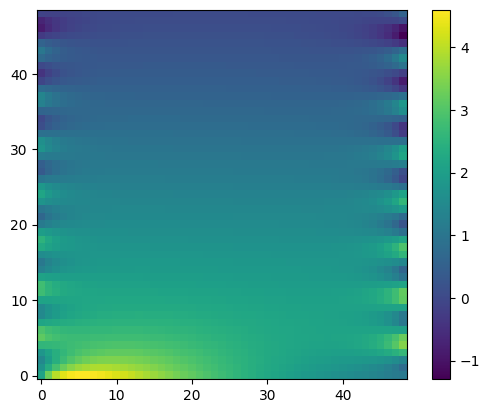

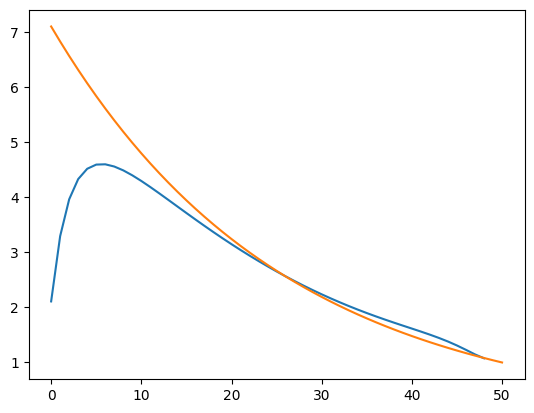

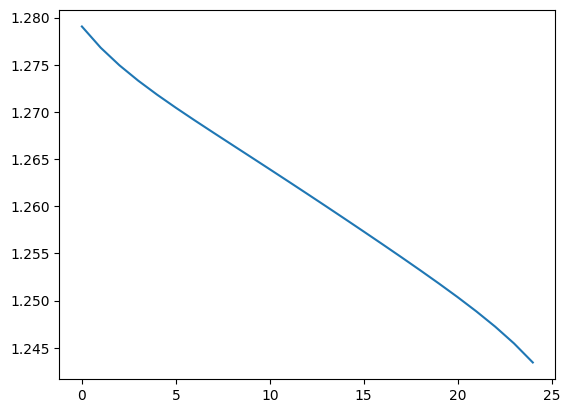

In [35]:
def solver(f, boundaries, a, M):
    h = 1/M
    k = 2*h

    alpha = a / h**2
    beta = 1 / (h**2 + k**2)
    consts = [beta, alpha, -2*(alpha + beta), alpha, beta]
    offsets = [-(M-1), -1, 0, 1, M-1]
    A = ndiag(consts, offsets, (M-1)**2)

    g = dirichlet2(boundaries, alpha, beta)
    U_vec = np.linalg.solve(A, -g + f)
    U = U_vec.reshape((M-1, M-1))
    return U

M = 50
f = np.zeros((M-1)**2)

l = 0*np.arange(M+1)
t = 0*np.log(50*np.arange(M+1) + 1)
r = np.sin(np.arange(M+1))
b = np.exp(2*np.arange(M+1)/(M+1))
boundaries = [l,t,r,b]

a = 1
U = solver(f, boundaries, a, M)

plt.imshow(U, origin = 'lower')
plt.colorbar()
plt.show()
plt.plot(U[0,:])
plt.plot(np.flip(b))
plt.show()
plt.plot(U[M//2,M//4:3*M//4])
